In [1]:
import re
import pandas as pd
import numpy as np

In [2]:
path = r'C:\Users\mgrinberg\Downloads\log.txt'
with open(path, 'r') as inp:
    content = inp.read()

In [4]:
content = re.sub("<class[\s\S]+?optimizers.(['.\w]+)'>", r"'\1'", content)

In [5]:
mods = re.findall('(\d+?),\s({.+})', content)

In [6]:
epochs = re.findall('Code\s(\d+?)\.\s(Epoch.+?);\n', content, flags=re.DOTALL)

In [7]:
dics = {}
for m in mods:
    code = m[0]
    arq = eval(m[1])
    hist = ''.join([e[1] for e in epochs if e[0] == code])
    try:
        arq['min_val_loss'] = min([float(n) for n in re.findall('val_loss: ([\d.]+?);', hist)])
    except ValueError:
        continue
    arq['max_val_coeff'] = max([float(n) for n in re.findall('val_coeff_determination: ([\-\d.]+?);', hist)])
    dics[code] = arq

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [9]:
pd.options.display.max_columns = 100

In [10]:
df = pd.DataFrame.from_dict(dics, dtype='float64', orient='index')

In [15]:
df = df.sort_values(by='min_val_loss', ascending=True)

In [16]:
df.head()

,batch,deep,deep_input,deep_lstm,deep_output,dense1_act,dense1_drop,dense1_n,dense2_act,dense2_drop,dense2_n,dense3_act,dense3_drop,dense3_n,dense4_act,dense4_drop,dense4_n,dense5_act,dense5_drop,dense5_n,dense6_act,dense6_drop,dense6_n,dense7_act,dense7_drop,dense7_n,dense8_act,dense8_drop,dense8_n,epochs,kernel_regularizer,loss,lstm1_drop,lstm1_n,lstm2_drop,lstm2_n,lstm3_drop,lstm3_n,epsilon,amsgrad,lr,optimizer,min_val_loss,max_val_coeff,residual,dense9_act,dense9_drop,dense9_n
506483,512.0,1.0,1.0,1.0,0.0,tanh,0.0,96.0,relu,0.1,32.0,tanh,0.5,8.0,relu,0.033333,96.0,tanh,0.1,32.0,relu,0.06,32.0,tanh,0.033333,32.0,tanh,0.0,32.0,12.0,0.0,mse,0.2,32.0,0.033333,32.0,0.066667,16.0,1.000000e-08,1.0,0.001,Adam,0.1610,0.8399,1.0,relu,0.0,96.0
17553,256.0,0.0,0.0,0.0,1.0,tanh,0.0,32.0,relu,0.1,32.0,tanh,0.4,16.0,relu,0.033333,96.0,tanh,0.1,32.0,relu,0.06,32.0,tanh,0.033333,32.0,relu,0.0,64.0,40.0,0.0,mse,0.2,8.0,0.033333,8.0,0.066667,16.0,1.000000e-08,1.0,0.005,Adam,0.1620,0.8076,NaN,NaN,NaN,NaN
106714,1024.0,1.0,0.0,0.0,0.0,tanh,0.0,96.0,relu,0.1,32.0,tanh,0.1,32.0,relu,0.033333,32.0,tanh,0.1,64.0,relu,0.18,32.0,tanh,0.033333,32.0,relu,0.0,64.0,40.0,0.0,mse,0.2,16.0,0.033333,8.0,0.066667,16.0,1.000000e-08,0.0,0.010,Adam,0.1656,0.8237,NaN,NaN,NaN,NaN
331345,128.0,1.0,1.0,0.0,1.0,tanh,0.0,96.0,relu,0.1,32.0,tanh,0.1,32.0,relu,0.033333,32.0,tanh,0.1,32.0,relu,0.24,32.0,tanh,0.033333,32.0,relu,0.0,96.0,40.0,0.0,mse,0.2,16.0,0.033333,32.0,0.066667,16.0,1.000000e-08,1.0,0.001,Adam,0.1784,0.8215,NaN,NaN,NaN,NaN
538340,128.0,1.0,1.0,0.0,0.0,tanh,0.0,96.0,relu,0.1,32.0,tanh,0.2,32.0,relu,0.033333,96.0,tanh,0.1,64.0,relu,0.24,32.0,tanh,0.033333,32.0,relu,0.0,96.0,40.0,0.0,mse,0.2,32.0,0.033333,16.0,0.066667,16.0,1.000000e-08,0.0,0.005,Adam,0.1821,0.8104,NaN,NaN,NaN,NaN


In [17]:
df_cat = pd.get_dummies(df.select_dtypes('object'))

In [18]:
df_ = pd.merge(df_cat, df.select_dtypes(np.number), left_index=True, right_index=True)

In [20]:
# Chequear porque sin esto chispotea
df_ = df_.drop(df_.std()[(df_.std() < 0.01)].index, axis=1)

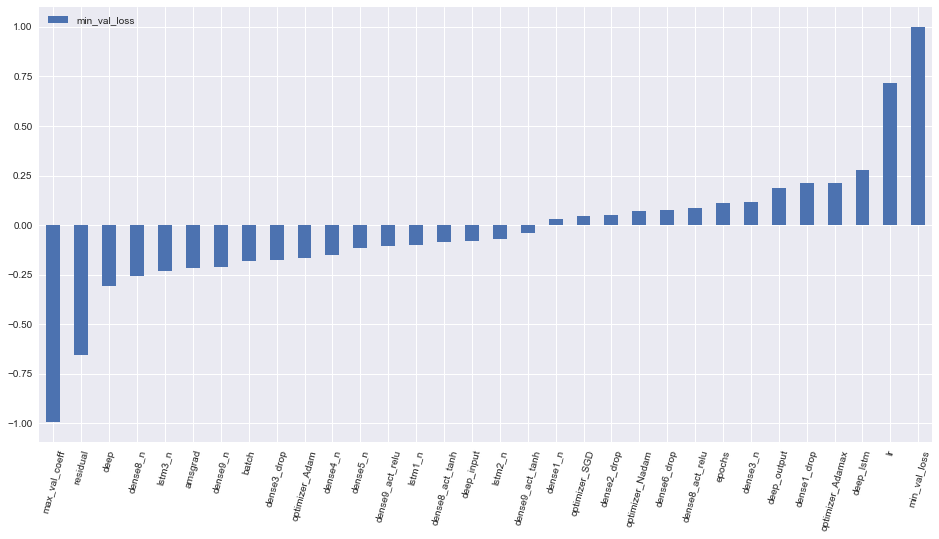

In [21]:
df_.corr('pearson').loc[:,['min_val_loss']].sort_values('min_val_loss').plot(kind='bar', figsize=(16,8))
plt.xticks(rotation=75);

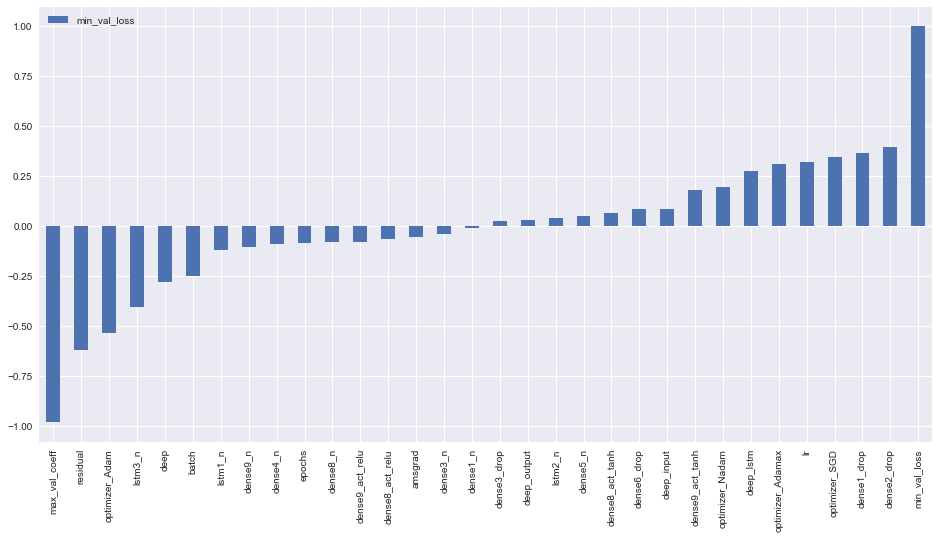

In [23]:
df_.corr(method='spearman').loc[:,['min_val_loss']].sort_values('min_val_loss').plot(kind='bar', figsize=(16,8));

In [50]:
df_.corr(method='spearman').loc[:,['min_val_loss']].sort_values('min_val_loss')

,min_val_loss
max_val_coeff,-0.976923
residual,-0.619780
optimizer_Adam,-0.532512
lstm3_n,-0.403330
deep,-0.277572
batch,-0.248257
lstm1_n,-0.116265
dense9_n,-0.102869
dense4_n,-0.086378
epochs,-0.083239
